### 线性回归

In [12]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(10)

In [13]:
# 创建训练数据集
x = torch.randn(20, 1) * 10
y = 2 * x + 5 + torch.randn(20, 1)

In [14]:
x.shape, y.shape

(torch.Size([20, 1]), torch.Size([20, 1]))

In [15]:
# 构建线性回归参数
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

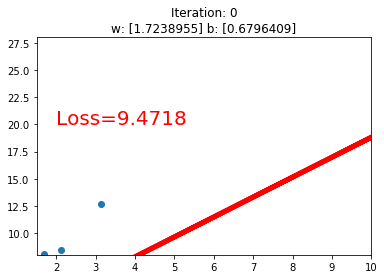

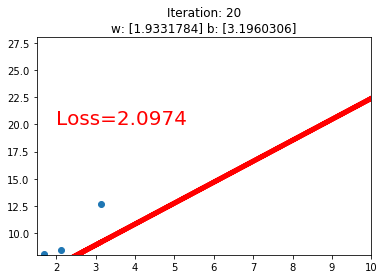

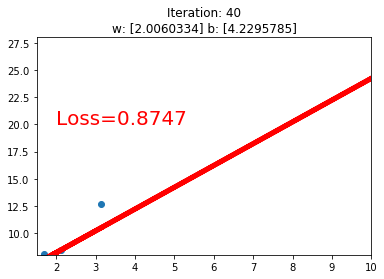

In [19]:
# 学习参数
lr = 0.05
for epoch in range(100):
    pred = x * w + b
    loss = (0.5 * (pred - y)**2).mean()
    loss.backward()
    w.data.sub_(lr * w.grad)
    b.data.sub_(lr * b.grad)
    w.grad.zero_()
    b.grad.zero_()

    # 绘图
    if epoch % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-', lw=5)
        plt.text(2,
                 20,
                 'Loss=%.4f' % loss.data.numpy(),
                 fontdict={
                     'size': 20,
                     'color': 'red'
                 })
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(epoch, w.data.numpy(),
                                                      b.data.numpy()))
        plt.pause(0.5)

        if loss.data.numpy() < 1:
            break

### 逻辑回归

In [46]:
import torch.nn as nn
import numpy as np

In [78]:
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
x0 = torch.normal(mean_value * n_data, 1) + bias
y0 = torch.zeros(sample_nums)
x1 = torch.normal(-mean_value * n_data, 1) + bias
y1 = torch.ones(sample_nums)
train_x = torch.cat([x0, x1], dim=0)
train_y = torch.cat([y0, y1], dim=0)

In [79]:
train_x.shape, train_y.shape

(torch.Size([200, 2]), torch.Size([200]))

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.feature = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.feature(x)
        return self.sigmoid(out)

In [81]:
model=Net()

In [82]:
model

Net(
  (feature): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [83]:
x = torch.randn((200, 2))
y = model(x)
y.shape

torch.Size([200, 1])

In [84]:
loss_fn = nn.BCELoss()
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

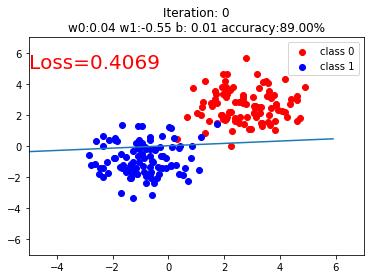

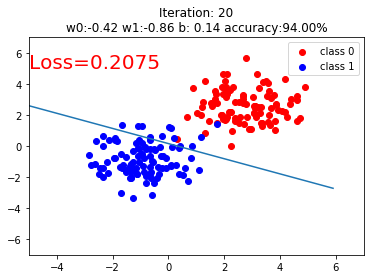

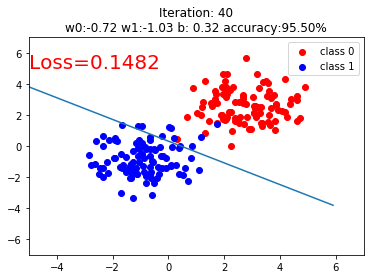

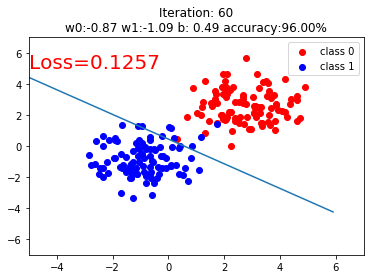

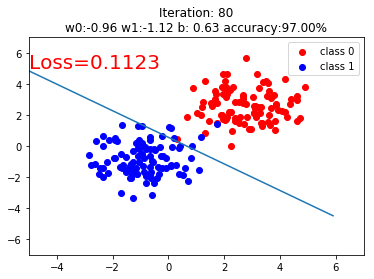

In [85]:
for epoch in range(100):
    y_pred = model(train_x)
    loss = loss_fn(y_pred.squeeze(), train_y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    # 绘图
    if epoch % 20 == 0:

        mask = y_pred.ge(0.5).float().squeeze()  # 以0.5为阈值进行分类
        correct = (mask == train_y).sum()  # 计算正确预测的样本个数
        acc = correct.item() / train_y.size(0)  # 计算分类准确率

        plt.scatter(x0.data.numpy()[:, 0],
                    x0.data.numpy()[:, 1],
                    c='r',
                    label='class 0')
        plt.scatter(x1.data.numpy()[:, 0],
                    x1.data.numpy()[:, 1],
                    c='b',
                    label='class 1')

        w0, w1 = model.feature.weight[0]
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(model.feature.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)

        plt.text(-5,
                 5,
                 'Loss=%.4f' % loss.data.numpy(),
                 fontdict={
                     'size': 20,
                     'color': 'red'
                 })
        plt.title(
            "Iteration: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".
            format(epoch, w0, w1, plot_b, acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc > 0.99:
            break